In [25]:
from pathlib import Path
from PIL import Image
from torchvision.transforms import functional as TF
import matplotlib.pyplot as plt
import torch
import numpy as np

ph2_root = Path('/dtu/datasets1/02516/PH2_Dataset_images')
drive_root = Path('/dtu/datasets1/02516/DRIVE')
img_size = (256, 256)

# PH2: list all sample folders (IMD*) and build image/mask paths
def list_ph2_ids(root: Path):
    return sorted([d.name for d in root.iterdir() if d.is_dir() and d.name.startswith('IMD')])

def load_ph2_sample(root: Path, sample_id: str):
    image_path = root / sample_id / f'{sample_id}_Dermoscopic_Image' / f'{sample_id}.bmp'
    mask_path = root / sample_id / f'{sample_id}_lesion' / f'{sample_id}_lesion.bmp'
    image = Image.open(image_path).convert('RGB')
    mask = Image.open(mask_path).convert('L')
    image = TF.resize(image, img_size, interpolation=TF.InterpolationMode.BILINEAR)
    mask = TF.resize(mask, img_size, interpolation=TF.InterpolationMode.NEAREST)
    image_t = TF.to_tensor(image)
    mask_t = torch.from_numpy((np.array(mask) > 0).astype(np.float32)).unsqueeze(0)
    return image_t, mask_t

# DRIVE: list all training images and map to masks
def list_drive_ids(root: Path):
    training = root / 'training'
    image_paths = sorted((training / 'images').glob('*_training.tif'))
    ids = [p.name.split('_')[0] for p in image_paths]
    return ids

def load_drive_sample(root: Path, sample_id: str):
    training = root / 'training'
    image_path = training / 'images' / f'{sample_id}_training.tif'
    mask_path = training / '1st_manual' / f'{sample_id}_manual1.gif'
    image = Image.open(image_path).convert('RGB')
    mask = Image.open(mask_path).convert('L')
    image = TF.resize(image, img_size, interpolation=TF.InterpolationMode.BILINEAR)
    mask = TF.resize(mask, img_size, interpolation=TF.InterpolationMode.NEAREST)
    image_t = TF.to_tensor(image)
    mask_t = torch.from_numpy((np.array(mask) > 0).astype(np.float32)).unsqueeze(0)
    return image_t, mask_t

    

ph2_ids = list_ph2_ids(ph2_root)
drive_ids = list_drive_ids(drive_root)
print(f'PH2 total samples (no split): {len(ph2_ids)}')
print(f'First 5 PH2 IDs: {ph2_ids[:5]}')
print(f'DRIVE total training samples (no split): {len(drive_ids)}')
print(f'First 5 DRIVE IDs: {drive_ids[:5]}')


PH2 total samples (no split): 200
First 5 PH2 IDs: ['IMD002', 'IMD003', 'IMD004', 'IMD006', 'IMD008']
DRIVE total training samples (no split): 20
First 5 DRIVE IDs: ['21', '22', '23', '24', '25']


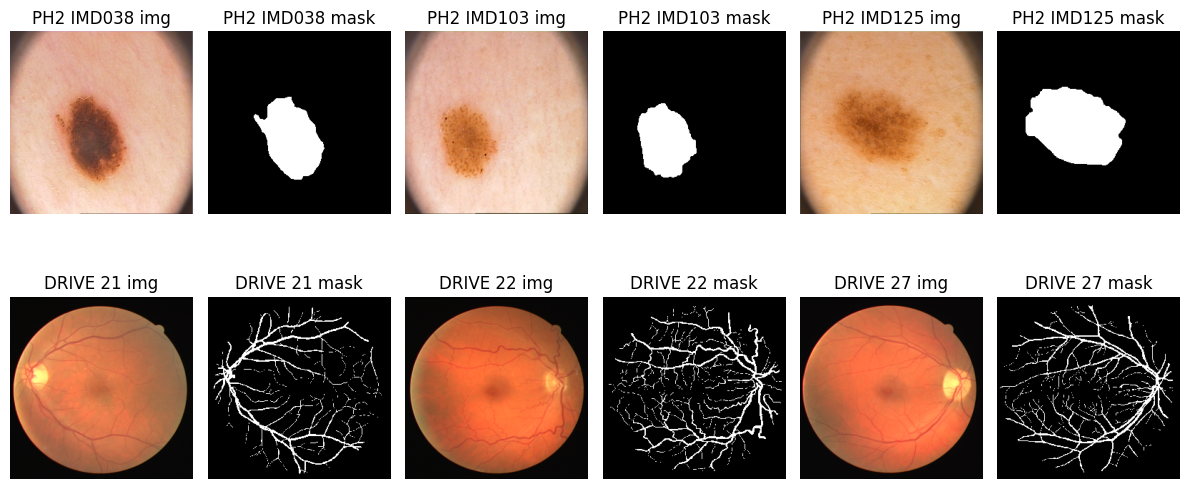

In [26]:
import random

num_random = 3  # Change number of random samples as desired

fig, axes = plt.subplots(2, num_random * 2, figsize=(4 * num_random, 6))

# Random PH2 samples
ph2_sample_ids = random.sample(ph2_ids, k=min(num_random, len(ph2_ids)))
for i, sample_id in enumerate(ph2_sample_ids):
    img_t, mask_t = load_ph2_sample(ph2_root, sample_id)
    img = img_t.permute(1, 2, 0).numpy()
    msk = mask_t.squeeze(0).numpy()
    axes[0, 2*i].imshow(img)
    axes[0, 2*i].set_title(f"PH2 {sample_id} img")
    axes[0, 2*i].axis('off')
    axes[0, 2*i+1].imshow(msk, cmap='gray')
    axes[0, 2*i+1].set_title(f"PH2 {sample_id} mask")
    axes[0, 2*i+1].axis('off')

# Random DRIVE samples
drive_sample_ids = random.sample(drive_ids, k=min(num_random, len(drive_ids)))
for i, sample_id in enumerate(drive_sample_ids):
    img_t, mask_t = load_drive_sample(drive_root, sample_id)
    img = img_t.permute(1, 2, 0).numpy()
    msk = mask_t.squeeze(0).numpy()
    axes[1, 2*i].imshow(img)
    axes[1, 2*i].set_title(f"DRIVE {sample_id} img")
    axes[1, 2*i].axis('off')
    axes[1, 2*i+1].imshow(msk, cmap='gray')
    axes[1, 2*i+1].set_title(f"DRIVE {sample_id} mask")
    axes[1, 2*i+1].axis('off')

plt.tight_layout()
plt.show()
